In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\Admin\\Desktop\\Jupyter_Projects\\KNN\\Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.shape

(400, 5)

In [5]:
X = data.iloc[:,2:4].values

In [13]:
y = data.iloc[:,-1].values

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=10)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train.shape

(320, 2)

In [25]:
np.sqrt(X_train.shape[0])

17.88854381999832

In [27]:
k = 17

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
knn = KNeighborsClassifier(n_neighbors = k)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [35]:
y_pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9375

In [39]:
# second method of calculating k
accuracy = []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [41]:
accuracy

[0.85,
 0.8625,
 0.9125,
 0.925,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.9375,
 0.925,
 0.9375,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95]

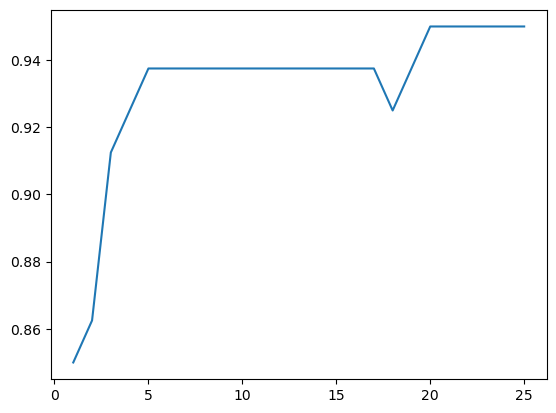

In [43]:
plt.plot(range(1,26),accuracy)

In [45]:
knn = KNeighborsClassifier(n_neighbors = 20)

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [49]:
y_pred = knn.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred)

0.95

In [ ]:
### created function to check it will purchase or not

In [84]:
def predict_output():
    age=int(input("Enter the age :"))
    salary=int(input("Enter the salary :"))

    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)

    if knn.predict(X_new)[0] == 0:
        return "will not purchase"
    else:
        return "will purchase"
    

In [86]:
predict_output()

Enter the age : 45
Enter the salary : 67676


'will not purchase'